# Esercitazione: Utilizzo di Gemini in Google Colab per il Machine Learning

Questo notebook guida gli studenti nell'utilizzo di Gemini, il modello di AI di Google, all'interno di Google Colab per sviluppare un progetto di Machine Learning. Seguiremo le principali fasi di un progetto ML:

1. Caricamento e analisi del dataset
2. Pulizia dei dati
3. Feature engineering
4. Realizzazione di un modello semplice
5. Implementazione di una clusterizzazione

## Come utilizzare questo notebook

- Le caselle di testo contengono i prompt da dare a Gemini
- Le caselle di codice sono dove incollare il codice generato da Gemini
- Segui le istruzioni passo dopo passo per completare l'esercitazione

## Configurazione iniziale

Prima di iniziare, dobbiamo attivare Gemini in Google Colab. Nella barra laterale di Colab, cerca l'icona di Gemini (un rombo colorato) e assicurati che sia attivato.

![Attivazione Gemini](https://i.imgur.com/example_image.png)

Installiamo anche le librerie necessarie per il nostro progetto.

In [ ]:
# Installa le librerie necessarie
!pip install pandas numpy matplotlib seaborn scikit-learn

## Fase 1: Caricamento e analisi del dataset

### Prompt per Gemini:

```
Voglio caricare e analizzare il dataset Iris di scikit-learn. Puoi fornirmi il codice per:
1. Caricare il dataset
2. Visualizzare le prime righe
3. Ottenere statistiche descrittive
4. Creare alcuni grafici per esplorare i dati
```

Copia il prompt sopra e incollalo nella chat di Gemini. Poi copia il codice generato nella cella seguente.

Prime 5 righe del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Statistiche descrittive:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%       

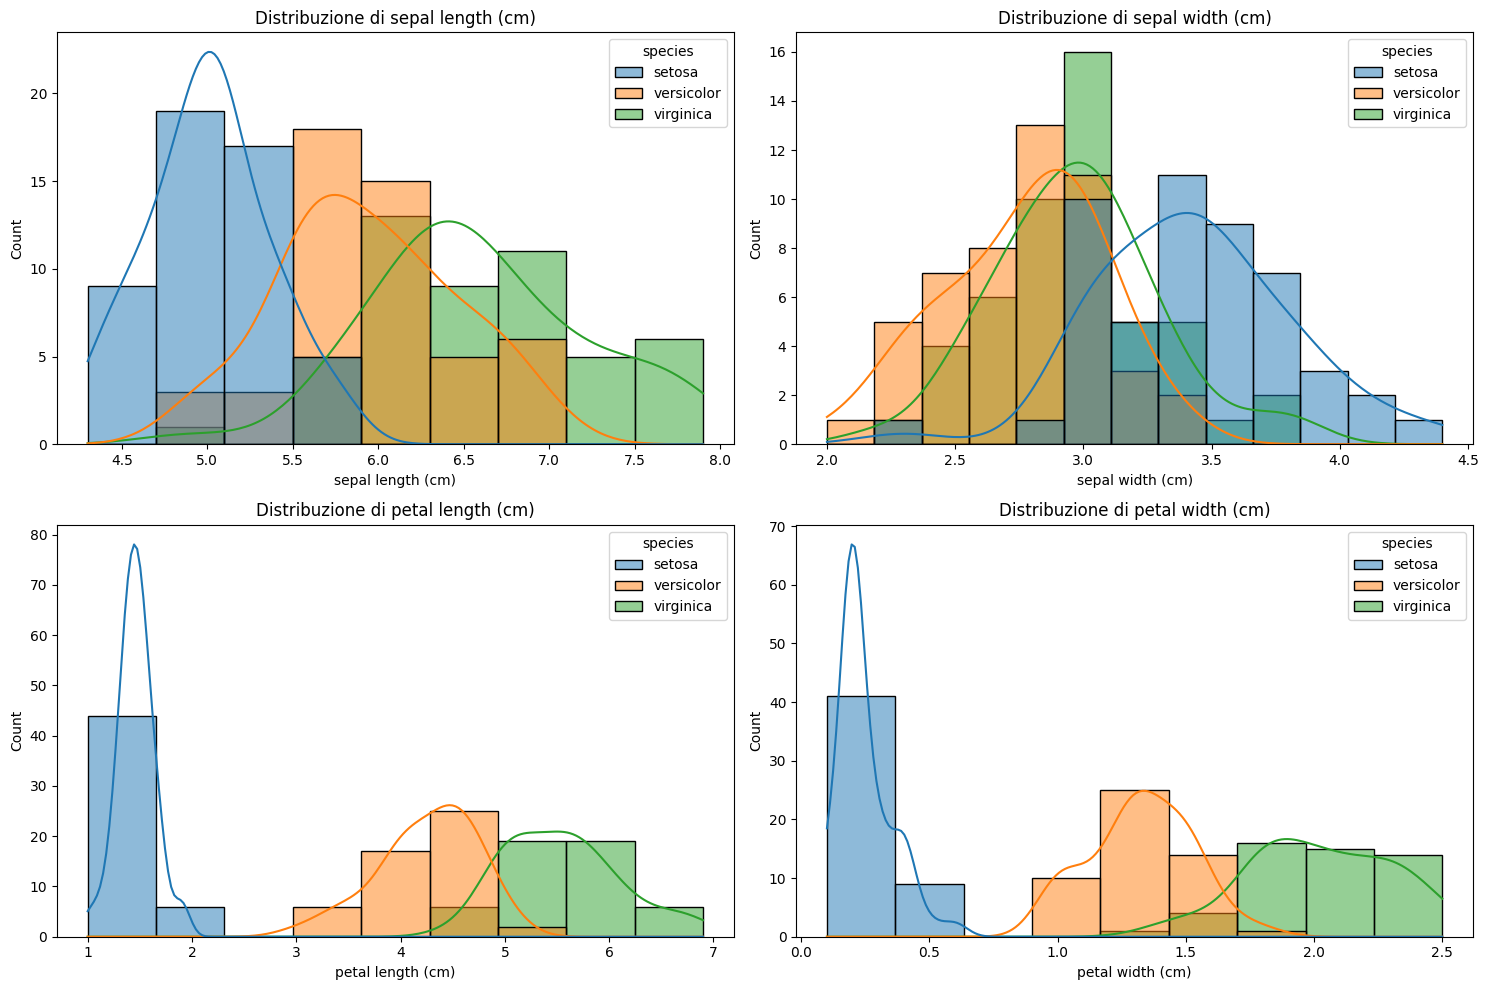

<Figure size 1200x1000 with 0 Axes>

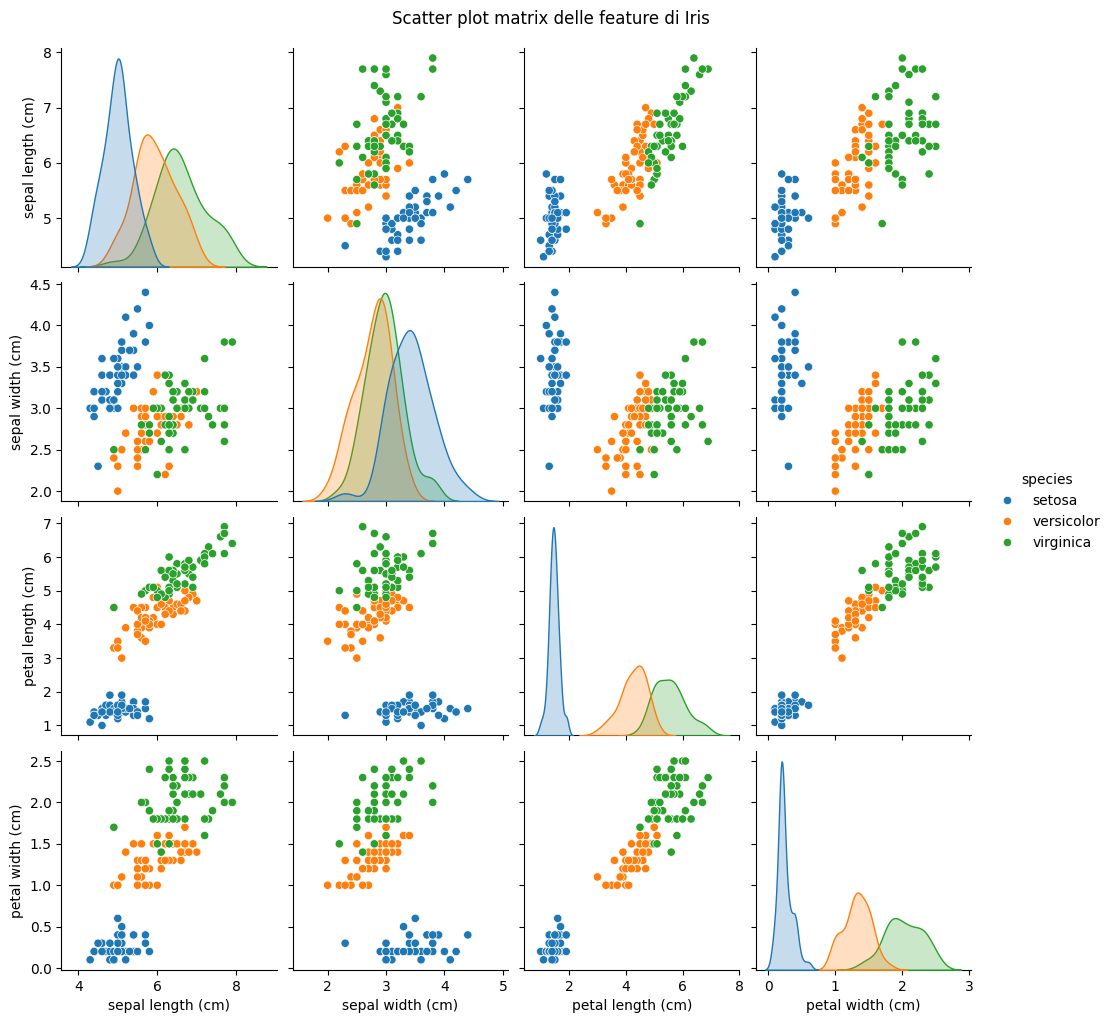

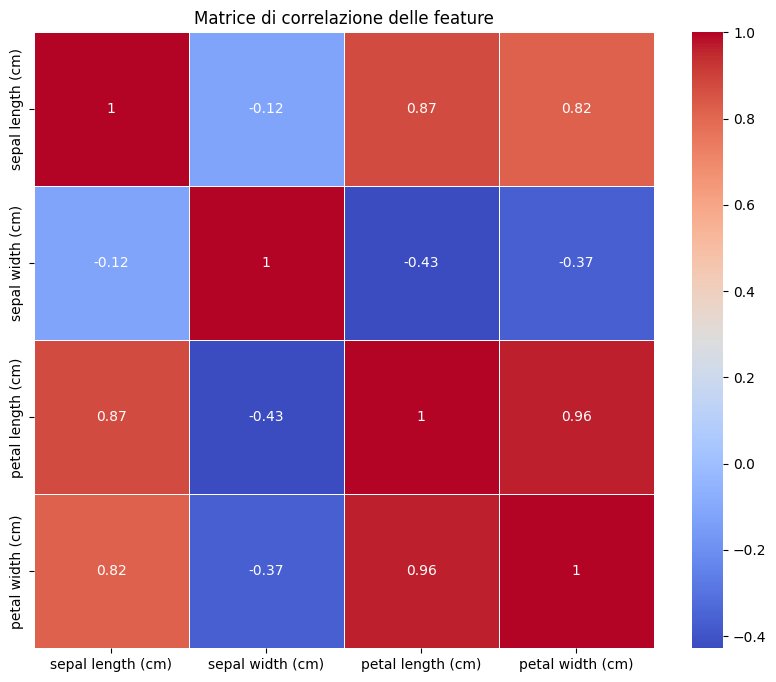

In [1]:
# Incolla qui il codice generato da Gemini per caricare e analizzare il dataset Iris

# Esempio di codice che potresti ottenere:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 1. Caricare il dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Creiamo un DataFrame per una migliore manipolazione
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# 2. Visualizzare le prime righe
print("Prime 5 righe del dataset:")
print(df.head())

# 3. Ottenere statistiche descrittive
print("\nStatistiche descrittive:")
print(df.describe())

# 4. Creare alcuni grafici per esplorare i dati
# Configurazione del plot
plt.figure(figsize=(15, 10))

# Istogrammi per ogni feature
plt.subplot(2, 2, 1)
sns.histplot(data=df, x=feature_names[0], hue='species', kde=True)
plt.title(f'Distribuzione di {feature_names[0]}')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x=feature_names[1], hue='species', kde=True)
plt.title(f'Distribuzione di {feature_names[1]}')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x=feature_names[2], hue='species', kde=True)
plt.title(f'Distribuzione di {feature_names[2]}')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x=feature_names[3], hue='species', kde=True)
plt.title(f'Distribuzione di {feature_names[3]}')

plt.tight_layout()
plt.show()

# Scatter plot per visualizzare le relazioni tra le feature
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species')
plt.suptitle('Scatter plot matrix delle feature di Iris', y=1.02)
plt.show()

# Heatmap della matrice di correlazione
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di correlazione delle feature')
plt.show()

### Analisi dei risultati

Osserva i risultati ottenuti. Quali sono le caratteristiche principali del dataset Iris? Quali relazioni noti tra le diverse feature?

Puoi chiedere a Gemini di aiutarti a interpretare i risultati con il seguente prompt:

```
Puoi aiutarmi a interpretare i risultati dell'analisi del dataset Iris? Quali sono le principali caratteristiche e relazioni che possiamo osservare?
```

## Fase 2: Pulizia dei dati

### Prompt per Gemini:

```
Voglio pulire il dataset Iris. Anche se questo dataset è già abbastanza pulito, puoi fornirmi il codice per:
1. Verificare se ci sono valori mancanti
2. Verificare se ci sono outlier utilizzando box plot
3. Normalizzare le feature
```

Copia il prompt sopra e incollalo nella chat di Gemini. Poi copia il codice generato nella cella seguente.

Valori mancanti nel dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


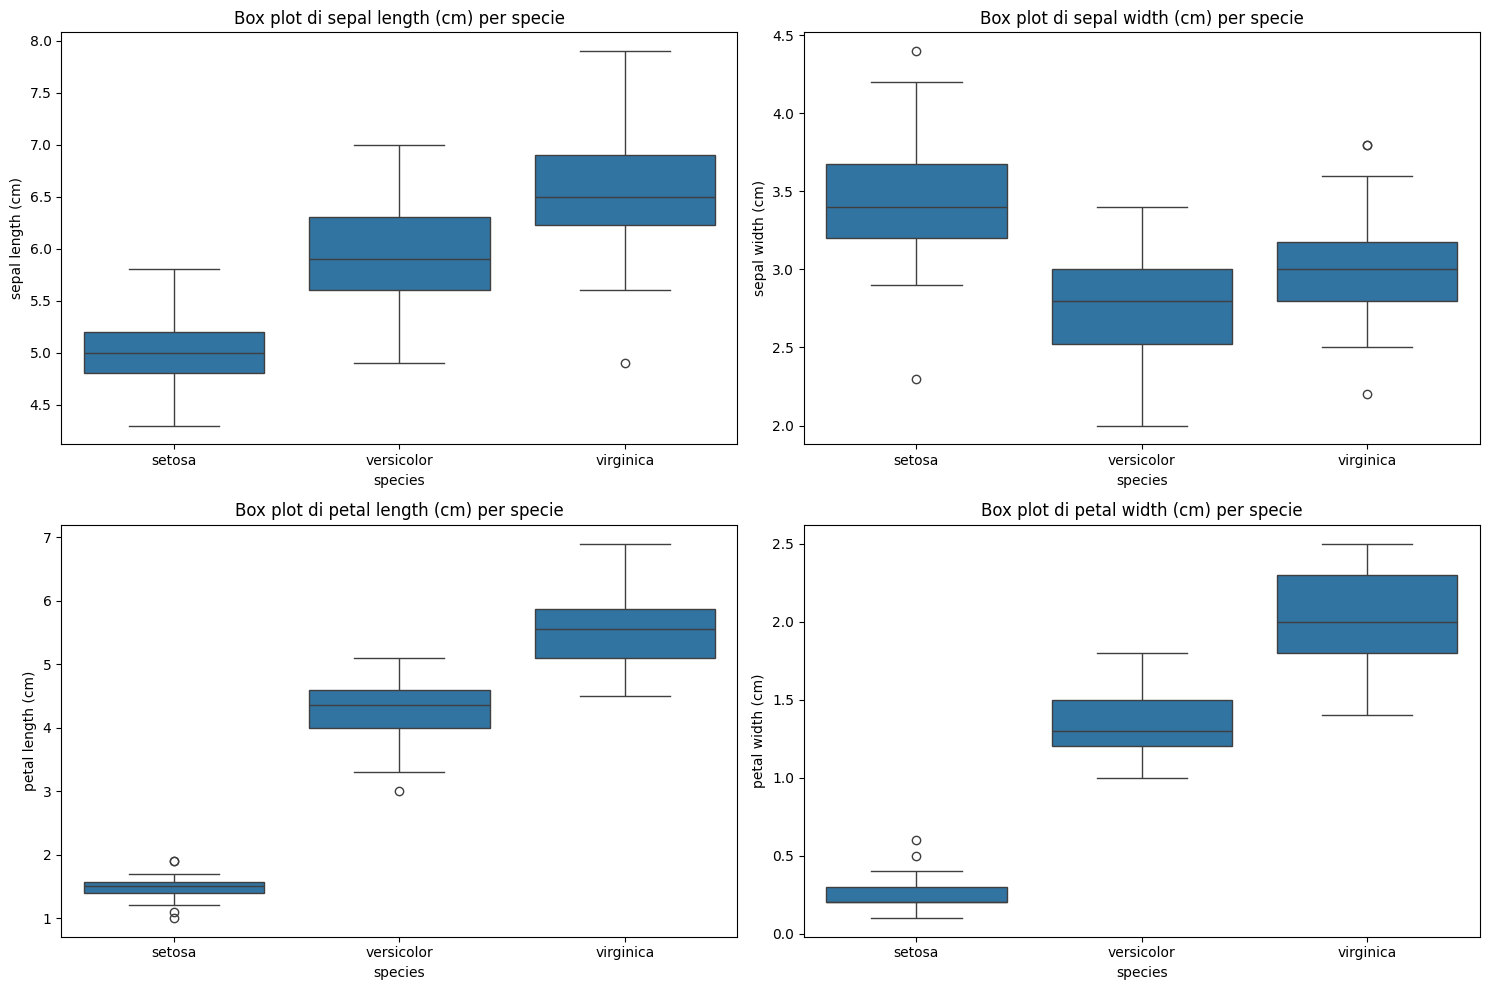

Nessun outlier trovato in sepal length (cm)
Outlier trovati in sepal width (cm): 4
Nessun outlier trovato in petal length (cm)
Nessun outlier trovato in petal width (cm)

Prime 5 righe del dataset normalizzato:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Statistiche delle feature normalizzate:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean      -1.468455e-15     -1.823726e-15      -1.610564e-15     -9.473903e-16
std        1.003350e+00      1.003350e+00  

In [2]:
# Incolla qui il codice generato da Gemini per la pulizia dei dati

# Esempio di codice che potresti ottenere:
# 1. Verificare se ci sono valori mancanti
print("Valori mancanti nel dataset:")
print(df.isnull().sum())

# 2. Verificare se ci sono outlier utilizzando box plot
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y=feature_names[0], data=df)
plt.title(f'Box plot di {feature_names[0]} per specie')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y=feature_names[1], data=df)
plt.title(f'Box plot di {feature_names[1]} per specie')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y=feature_names[2], data=df)
plt.title(f'Box plot di {feature_names[2]} per specie')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y=feature_names[3], data=df)
plt.title(f'Box plot di {feature_names[3]} per specie')

plt.tight_layout()
plt.show()

# Funzione per identificare gli outlier con il metodo IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Verifichiamo gli outlier per ogni feature
for feature in feature_names:
    outliers = identify_outliers(df, feature)
    if len(outliers) > 0:
        print(f"Outlier trovati in {feature}: {len(outliers)}")
    else:
        print(f"Nessun outlier trovato in {feature}")

# 3. Normalizzare le feature
from sklearn.preprocessing import StandardScaler

# Creiamo una copia del DataFrame originale
df_normalized = df.copy()

# Inizializziamo lo scaler
scaler = StandardScaler()

# Normalizziamo solo le colonne numeriche
numeric_columns = df.drop('species', axis=1).columns
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Visualizziamo le prime righe del dataset normalizzato
print("\nPrime 5 righe del dataset normalizzato:")
print(df_normalized.head())

# Verifichiamo la media e la deviazione standard delle feature normalizzate
print("\nStatistiche delle feature normalizzate:")
print(df_normalized[numeric_columns].describe().loc[['mean', 'std']])

### Riflessione sulla pulizia dei dati

Rifletti sui risultati della pulizia dei dati:
- Ci sono valori mancanti nel dataset?
- Hai identificato outlier significativi?
- Come sono cambiate le statistiche dopo la normalizzazione?

Puoi chiedere a Gemini di spiegarti l'importanza della normalizzazione dei dati nel machine learning con il seguente prompt:

```
Perché la normalizzazione dei dati è importante nel machine learning? In quali algoritmi è particolarmente cruciale?
```

## Fase 3: Feature Engineering

### Prompt per Gemini:

```
Voglio fare feature engineering sul dataset Iris. Puoi fornirmi il codice per:
1. Creare feature polinomiali (ad esempio, il quadrato delle feature esistenti)
2. Creare feature di interazione (prodotto tra coppie di feature)
3. Applicare PCA per ridurre la dimensionalità e visualizzare i dati in 2D
```

Copia il prompt sopra e incollalo nella chat di Gemini. Poi copia il codice generato nella cella seguente.

In [ ]:
# Incolla qui il codice generato da Gemini per il feature engineering

# Esempio di codice che potresti ottenere:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Utilizziamo il dataset originale per il feature engineering
X_original = df.drop('species', axis=1)
y = df['species']

# 1. Creare feature polinomiali (quadrato delle feature esistenti)
# Inizializziamo il transformer per feature polinomiali di grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Applichiamo la trasformazione
X_poly = poly.fit_transform(X_original)

# Creiamo un DataFrame con le nuove feature
poly_features = poly.get_feature_names_out(X_original.columns)
df_poly = pd.DataFrame(X_poly, columns=poly_features)

# Visualizziamo le prime righe con le feature polinomiali
print("Dataset con feature polinomiali (prime 5 righe, prime 10 colonne):")
print(df_poly.iloc[:5, :10])
print(f"Numero di feature originali: {X_original.shape[1]}")
print(f"Numero di feature dopo trasformazione polinomiale: {df_poly.shape[1]}")

# 2. Creare feature di interazione manualmente (per una migliore comprensione)
df_interaction = X_original.copy()

# Creiamo le interazioni tra coppie di feature
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        feature_name_i = feature_names[i]
        feature_name_j = feature_names[j]
        interaction_name = f"{feature_name_i}_{feature_name_j}_interaction"
        df_interaction[interaction_name] = df_interaction[feature_name_i] * df_interaction[feature_name_j]

# Visualizziamo le prime righe con le feature di interazione
print("\nDataset con feature di interazione (prime 5 righe):")
print(df_interaction.head())

# 3. Applicare PCA per ridurre la dimensionalità e visualizzare i dati in 2D
# Inizializziamo PCA con 2 componenti
pca = PCA(n_components=2)

# Applichiamo PCA ai dati originali
X_pca = pca.fit_transform(X_original)

# Creiamo un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = y.values

# Visualizziamo le prime righe
print("\nDataset dopo PCA (prime 5 righe):")
print(df_pca.head())

# Visualizziamo la varianza spiegata da ciascuna componente
print(f"\nVarianza spiegata da ciascuna componente: {pca.explained_variance_ratio_}")
print(f"Varianza totale spiegata: {sum(pca.explained_variance_ratio_):.4f} (o {sum(pca.explained_variance_ratio_)*100:.2f}%)")

# Visualizziamo i dati nel nuovo spazio 2D
plt.figure(figsize=(10, 8))
species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species in species_colors:
    subset = df_pca[df_pca['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], c=species_colors[species], label=species, alpha=0.7)

plt.title('PCA del dataset Iris')
plt.xlabel('Prima Componente Principale')
plt.ylabel('Seconda Componente Principale')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualizziamo i loadings (contributi delle feature originali alle componenti principali)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Contributi delle feature originali alle componenti principali')
plt.show()

### Riflessione sul feature engineering

Rifletti sui risultati del feature engineering:
- Come sono cambiate le dimensioni del dataset dopo l'aggiunta delle feature polinomiali?
- Quali informazioni puoi ottenere dalla visualizzazione PCA?
- Quali feature originali contribuiscono maggiormente alle componenti principali?

Puoi chiedere a Gemini di spiegarti l'importanza del feature engineering nel machine learning con il seguente prompt:

```
Perché il feature engineering è importante nel machine learning? Puoi spiegarmi i vantaggi e gli svantaggi delle tecniche che abbiamo utilizzato (feature polinomiali, interazioni e PCA)?
```

## Fase 4: Realizzazione di un modello semplice

### Prompt per Gemini:

```
Voglio creare un modello di classificazione per il dataset Iris. Puoi fornirmi il codice per:
1. Dividere il dataset in training e test set
2. Addestrare un modello di Random Forest
3. Valutare le performance del modello (accuracy, matrice di confusione, report di classificazione)
4. Visualizzare l'importanza delle feature
```

Copia il prompt sopra e incollalo nella chat di Gemini. Poi copia il codice generato nella cella seguente.

In [ ]:
# Incolla qui il codice generato da Gemini per la creazione del modello

# Esempio di codice che potresti ottenere:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Utilizziamo il dataset originale
X = df.drop('species', axis=1)
y = df['species']

# 1. Dividere il dataset in training e test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifichiamo le dimensioni dei set
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")
print(f"Dimensioni y_train: {y_train.shape}")
print(f"Dimensioni y_test: {y_test.shape}")

# Verifichiamo la distribuzione delle classi nei set di training e test
print("\nDistribuzione delle classi nel set di training:")
print(y_train.value_counts())
print("\nDistribuzione delle classi nel set di test:")
print(y_test.value_counts())

# 2. Addestrare un modello di Random Forest
# Inizializziamo il modello
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestriamo il modello
rf_model.fit(X_train, y_train)

# Facciamo previsioni sul set di test
y_pred = rf_model.predict(X_test)

# 3. Valutare le performance del modello
# Calcoliamo l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modello: {accuracy:.4f}")

# Calcoliamo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizziamo la matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione')
plt.show()

# Generiamo il report di classificazione
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nReport di classificazione:")
print(report)

# 4. Visualizzare l'importanza delle feature
# Otteniamo l'importanza delle feature
feature_importances = rf_model.feature_importances_

# Creiamo un DataFrame per visualizzare meglio
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\nImportanza delle feature:")
print(feature_importance_df)

# Visualizziamo l'importanza delle feature
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importanza delle Feature nel Random Forest')
plt.tight_layout()
plt.show()

### Riflessione sul modello

Rifletti sui risultati del modello:
- Qual è l'accuracy del modello? È un buon risultato?
- Ci sono classi che il modello fatica a distinguere?
- Quali sono le feature più importanti per la classificazione?

Puoi chiedere a Gemini di spiegarti come funziona l'algoritmo Random Forest e come interpretare i risultati con il seguente prompt:

```
Puoi spiegarmi come funziona l'algoritmo Random Forest? Come dovrei interpretare la matrice di confusione e l'importanza delle feature?
```

## Fase 5: Implementazione di una clusterizzazione

### Prompt per Gemini:

```
Voglio implementare un algoritmo di clustering sul dataset Iris. Puoi fornirmi il codice per:
1. Applicare l'algoritmo K-means con k=3 (poiché sappiamo che ci sono 3 specie)
2. Visualizzare i cluster nello spazio 2D (usando PCA)
3. Valutare la qualità del clustering confrontando i cluster con le etichette reali
4. Determinare il numero ottimale di cluster usando il metodo del gomito
```

Copia il prompt sopra e incollalo nella chat di Gemini. Poi copia il codice generato nella cella seguente.

In [ ]:
# Incolla qui il codice generato da Gemini per la clusterizzazione

# Esempio di codice che potresti ottenere:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utilizziamo il dataset originale
X = df.drop('species', axis=1).values
y_true = df['species']

# Convertiamo le etichette in numeri per facilitare il confronto
y_true_numeric = pd.factorize(y_true)[0]

# Standardizziamo i dati per il clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Applicare l'algoritmo K-means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# 2. Visualizzare i cluster nello spazio 2D (usando PCA)
# Applichiamo PCA per ridurre a 2 dimensioni
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creiamo un DataFrame con i risultati
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_kmeans
df_pca['True_Species'] = y_true.values

# Visualizziamo i cluster
plt.figure(figsize=(14, 6))

# Plot dei cluster predetti
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Cluster K-means (k=3)')
plt.legend()

# Plot delle specie reali
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='True_Species', data=df_pca, palette='Set1', s=100, alpha=0.7)
plt.title('Specie reali')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Valutare la qualità del clustering confrontando i cluster con le etichette reali
# Calcoliamo l'Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true_numeric, y_kmeans)
print(f"Adjusted Rand Index: {ari:.4f}")
# L'ARI varia da -1 a 1, dove 1 indica un clustering perfetto

# Calcoliamo il Silhouette Score
silhouette = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette:.4f}")
# Il Silhouette Score varia da -1 a 1, dove valori più alti indicano cluster meglio definiti

# Creiamo una tabella di contingenza per vedere come i cluster si mappano alle specie reali
contingency_table = pd.crosstab(y_true, pd.Series(y_kmeans, name='Cluster'))
print("\nTabella di contingenza (specie reali vs cluster):")
print(contingency_table)

# Visualizziamo la tabella di contingenza come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Tabella di contingenza: Specie reali vs Cluster')
plt.show()

# 4. Determinare il numero ottimale di cluster usando il metodo del gomito
# Calcoliamo l'inerzia (somma dei quadrati delle distanze) per diversi valori di k
inertia = []
silhouette_scores = []
k_range = range(1, 11)

for k in k_range:
    if k == 1:
        # Per k=1 non possiamo calcolare il silhouette score
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(None)
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Visualizziamo il grafico dell'inerzia (metodo del gomito)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inerzia')
plt.title('Metodo del gomito per determinare k ottimale')
plt.grid(True, linestyle='--', alpha=0.7)

# Visualizziamo il grafico del silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'o-', markersize=8)
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per diversi valori di k')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Troviamo il k ottimale in base al silhouette score
optimal_k = k_range[1:][np.argmax(silhouette_scores[1:])]
print(f"\nNumero ottimale di cluster in base al silhouette score: {optimal_k}")

### Riflessione sulla clusterizzazione

Rifletti sui risultati della clusterizzazione:
- I cluster identificati da K-means corrispondono alle specie reali?
- Qual è il numero ottimale di cluster secondo il metodo del gomito e il silhouette score?
- Quali sono i vantaggi e gli svantaggi dell'algoritmo K-means?

Puoi chiedere a Gemini di spiegarti come funziona l'algoritmo K-means e come interpretare i risultati con il seguente prompt:

```
Puoi spiegarmi come funziona l'algoritmo K-means? Come dovrei interpretare l'Adjusted Rand Index, il Silhouette Score e il metodo del gomito?
```

## Conclusioni e sfide aggiuntive

Congratulazioni! Hai completato l'esercitazione sull'utilizzo di Gemini in Google Colab per un progetto di Machine Learning. Hai seguito le principali fasi di un progetto ML:

1. Caricamento e analisi del dataset
2. Pulizia dei dati
3. Feature engineering
4. Realizzazione di un modello semplice
5. Implementazione di una clusterizzazione

### Sfide aggiuntive

Se vuoi approfondire ulteriormente, ecco alcune sfide che puoi provare:

1. Prova a utilizzare un dataset diverso (ad esempio, Wine o Breast Cancer da scikit-learn)
2. Implementa altri algoritmi di classificazione (SVM, Logistic Regression, Neural Network)
3. Prova altri algoritmi di clustering (DBSCAN, Hierarchical Clustering)
4. Implementa una pipeline completa di ML con GridSearchCV per l'ottimizzazione degli iperparametri
5. Crea una visualizzazione interattiva dei risultati con Plotly

Per ciascuna di queste sfide, puoi chiedere aiuto a Gemini con prompt specifici.

### Prompt per sfide aggiuntive

Ecco alcuni prompt che puoi utilizzare per le sfide aggiuntive:

```
Puoi fornirmi il codice per caricare e analizzare il dataset Wine di scikit-learn?
```

```
Puoi mostrarmi come implementare e confrontare diversi algoritmi di classificazione (SVM, Logistic Regression, Neural Network) sul dataset Iris?
```

```
Puoi fornirmi il codice per implementare DBSCAN e Hierarchical Clustering sul dataset Iris e confrontare i risultati con K-means?
```

```
Puoi mostrarmi come creare una pipeline completa di ML con GridSearchCV per ottimizzare gli iperparametri di un Random Forest sul dataset Iris?
```

```
Puoi fornirmi il codice per creare una visualizzazione interattiva dei risultati di clustering con Plotly?
```